(60000, 28, 28, 1)
(10000, 28, 28, 1)
Epoch 1/10


C:\Users\vikas\AppData\Local\Programs\Python\Python312\Lib\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


1875/1875 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.8517 - loss: 0.5443 - val_accuracy: 0.9404 - val_loss: 0.2046
Epoch 2/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.9492 - loss: 0.1826 - val_accuracy: 0.9632 - val_loss: 0.1328
Epoch 3/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.9638 - loss: 0.1286 - val_accuracy: 0.9682 - val_loss: 0.1103
Epoch 4/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.9700 - loss: 0.1025 - val_accuracy: 0.9681 - val_loss: 0.1017
Epoch 5/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.9738 - loss: 0.0930 - val_accuracy: 0.9722 - val_loss: 0.0907
Epoch 6/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.9784 - loss: 0.0749 - val_accuracy: 0.9729 - val_loss: 0.0899
Epoch 7/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.9796 - loss: 0.0692 - val_accuracy: 0.9728 - val_loss: 0.0878
Epoch 8/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.9821 - loss: 0.0618 - val_accurac

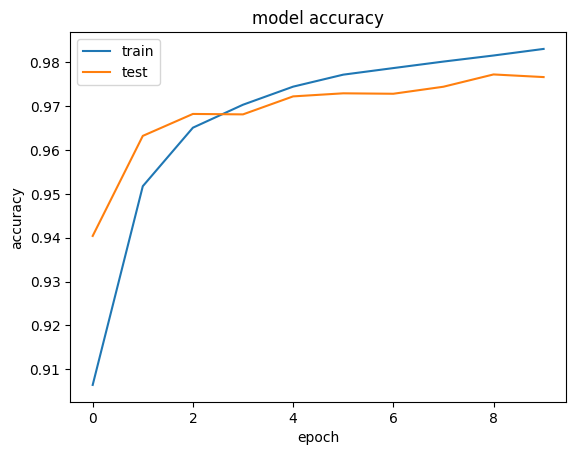

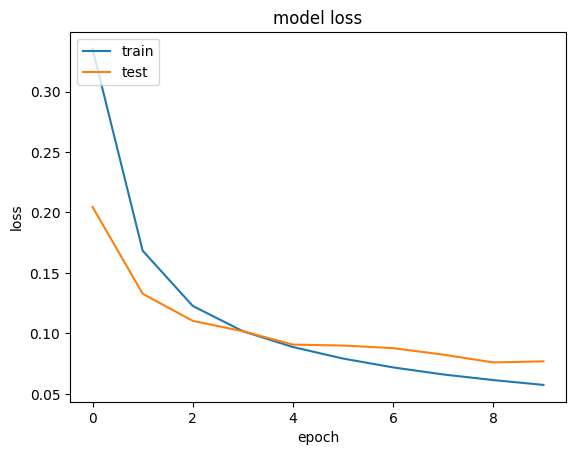

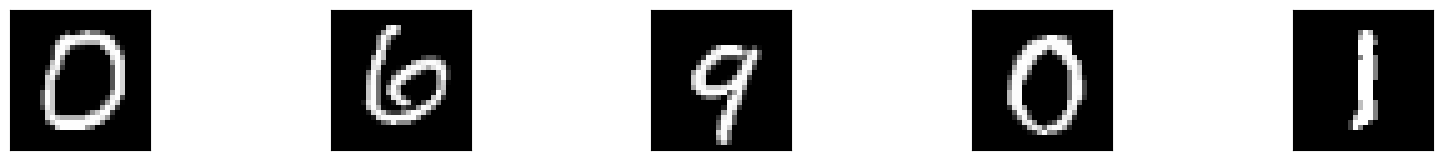

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 54ms/step


array([0, 6, 9, 0, 1])

In [3]:
# Import necessary libraries
from keras.models import Sequential
from keras.layers import Input, Dense
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
import numpy as np, pandas as pd, matplotlib.pyplot as plt
from keras.datasets import mnist

(x_train, y_train), (x_test, y_test) = mnist.load_data()
x_train = x_train.astype('float32') / 255.
x_test = x_test.astype('float32') / 255.

x_train = np.expand_dims(x_train, axis=3)
x_test = np.expand_dims(x_test, axis=3)

print(x_train.shape)
print(x_test.shape)

from tensorflow.keras.layers import Conv2D, MaxPooling2D, Dense, Flatten

num_filters = 8
filter_size = 3
pool_size = 2

model = Sequential([
  Conv2D(num_filters, filter_size, input_shape=(28, 28, 1)),
  MaxPooling2D(pool_size=pool_size),
  Flatten(),
  Dense(10, activation='softmax'),
])

model.compile(
  'adam',
  loss='categorical_crossentropy',
  metrics=['accuracy'],
)

from tensorflow.keras.utils import to_categorical
history=model.fit(
  x_train,
  to_categorical(y_train),
  epochs=10,
  validation_data=(x_test, to_categorical(y_test)),
)

plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()
# summarize history for loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

plt.figure(figsize=(20, 4))
for i in range(5):
    # Display original
    ax = plt.subplot(2, 5, i + 1)
    plt.imshow(x_test[i+10].reshape(28, 28))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)
plt.show()

predictions = model.predict(x_test[10:15])

np.argmax(predictions, axis=1)


00%|████████████████████████████████████████████████████████████████████████████████| 169M/169M [06:52<00:00, 410kB/s]

Extracting ./data\cifar-100-python.tar.gz to ./data
Files already downloaded and verified
Epoch 1, Loss: 3.651
Epoch 2, Loss: 3.104
Epoch 3, Loss: 2.879
Epoch 4, Loss: 2.742
Epoch 5, Loss: 2.640
Epoch 6, Loss: 2.559
Epoch 7, Loss: 2.490
Epoch 8, Loss: 2.431
Epoch 9, Loss: 2.378
Epoch 10, Loss: 2.322


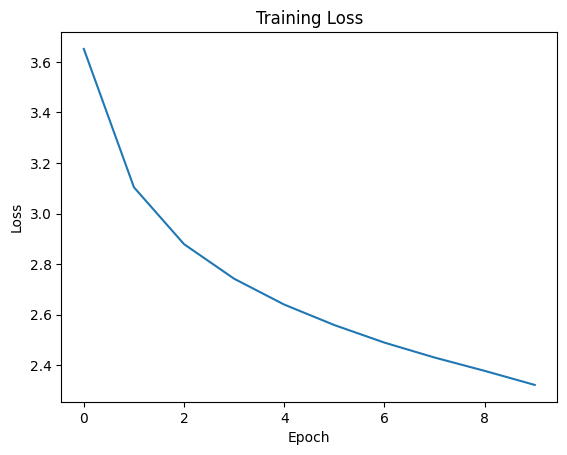

In [8]:


import torch
import torch.nn as nn
import torchvision
import torchvision.transforms as transforms
import matplotlib.pyplot as plt

# Load CIFAR-100
transform = transforms.Compose([
    transforms.ToTensor(),
    transforms.Normalize((0.5, 0.5, 0.5), (0.5, 0.5, 0.5))
])

trainset = torchvision.datasets.CIFAR100(root='./data', train=True,
                                      download=True, transform=transform)
trainloader = torch.utils.data.DataLoader(trainset, batch_size=128,
                                      shuffle=True)

testset = torchvision.datasets.CIFAR100(root='./data', train=False,
                                     download=True, transform=transform)
testloader = torch.utils.data.DataLoader(testset, batch_size=128,
                                     shuffle=False)

# Simple CNN model
class SimpleCNN(nn.Module):
    def __init__(self):
        super(SimpleCNN, self).__init__()
        self.conv1 = nn.Conv2d(3, 8, 3)  # Similar to your original 8 filters
        self.pool = nn.MaxPool2d(2, 2)
        self.flatten = nn.Flatten()
        self.fc1 = nn.Linear(8 * 15 * 15, 100)  # 100 classes for CIFAR-100

    def forward(self, x):
        x = self.pool(torch.relu(self.conv1(x)))
        x = self.flatten(x)
        x = self.fc1(x)
        return x

model = SimpleCNN()
criterion = nn.CrossEntropyLoss()
optimizer = torch.optim.Adam(model.parameters())

# Training
train_losses = []
for epoch in range(10):  # 10 epochs like your original
    running_loss = 0.0
    for i, (inputs, labels) in enumerate(trainloader):
        optimizer.zero_grad()
        outputs = model(inputs)
        loss = criterion(outputs, labels)
        loss.backward()
        optimizer.step()
        running_loss += loss.item()
        
    avg_loss = running_loss / len(trainloader)
    train_losses.append(avg_loss)
    print(f'Epoch {epoch+1}, Loss: {avg_loss:.3f}')

# Plot results
plt.plot(train_losses)
plt.title('Training Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.show()